<a class="anchor" id="0"></a>
# **Support Vector Machines Classifier Tutorial with Python** 

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Dataset Description](#1)
2.	[Import Libraries](#2)
3.	[Import Dataset](#3)
4.	[Exploratory Data Analysis](#4)
5.	[Declare feature vector and target variable](#5)
6.	[Feature Scaling](#6)
7.	[Split data into separate training and test set](#7)
8.	[Run SVM with default hyperparameters](#8)
9.	[Evaluating the Model on Test Dataset](#9)
10.	[Run SVM with Best Parameters (GridSearchCV)](#10)
11.	[Overall Performance of the Model](#11)
12.	[Finding the Best Threshold for Max F1 Score](#12)


# **1. Dataset description** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


I have used the **Predicting a Pulsar Star** dataset for this project.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Classification algorithms in particular are being adopted, which treat the data sets as binary classification problems. Here the legitimate pulsar examples form  minority positive class and spurious examples form the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


### Attribute Information:


Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

# **2. Import libraries** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


I will start off by importing the required Python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **3. Import dataset** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

In [2]:
df = pd.read_csv("pulsar_stars.csv")

# **4. Exploratory data analysis** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [3]:
df.shape

(17898, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562,55.684,-0.235,-0.700,3.200,19.110,7.976,74.242,0
1,102.508,58.882,0.465,-0.515,1.677,14.860,10.576,127.394,0
2,103.016,39.342,0.323,1.051,3.121,21.745,7.736,63.172,0
3,136.750,57.178,-0.068,-0.636,3.643,20.959,6.896,53.594,0
4,88.727,40.672,0.601,1.123,1.179,11.469,14.270,252.567,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
# Burada target' ımız target_class olacak

In [7]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()
# burada sütunların isimlerinin başında ve sonundaki boşlukları sildik.

In [9]:
df.columns = ["IP mean", "IP Sd", "IP Kurtosis", "IP Skewness", "DM-SNR Mean", "DM-SNR Sd",
              "DM-SNR Kurtosis", "DM-SNR Skewness", "target_class"]
# Sütun isimlerini daha kısa hale getirdik.
# IP : Integrated profile
# DM-SNR : Delta modulation and signal to noise ratio.

In [10]:
df["target_class"].value_counts(normalize=True)
# Datamızda imbalance durum var.

0   0.908
1   0.092
Name: target_class, dtype: float64

### Explore missing values in variables

In [11]:
df.isnull().sum()

IP mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

### Outliers in numerical variables

In [12]:
df.describe()

,IP mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000
mean,111.080,46.550,0.478,1.770,12.614,26.327,8.304,104.858,0.092
std,25.653,6.843,1.064,6.168,29.473,19.471,4.506,106.515,0.288
min,5.812,24.772,-1.876,-1.792,0.213,7.370,-3.139,-1.977,0.000
25%,100.930,42.376,0.027,-0.189,1.923,14.437,5.782,34.961,0.000
50%,115.078,46.947,0.223,0.199,2.802,18.461,8.434,83.065,0.000
75%,127.086,51.023,0.473,0.928,5.464,28.428,10.703,139.309,0.000
max,192.617,98.779,8.070,68.102,223.392,110.642,34.540,1191.001,1.000


In [13]:
# Datasetimizde outlier olabilir. Bazı feature'larda std, mean'dan daha büyük.

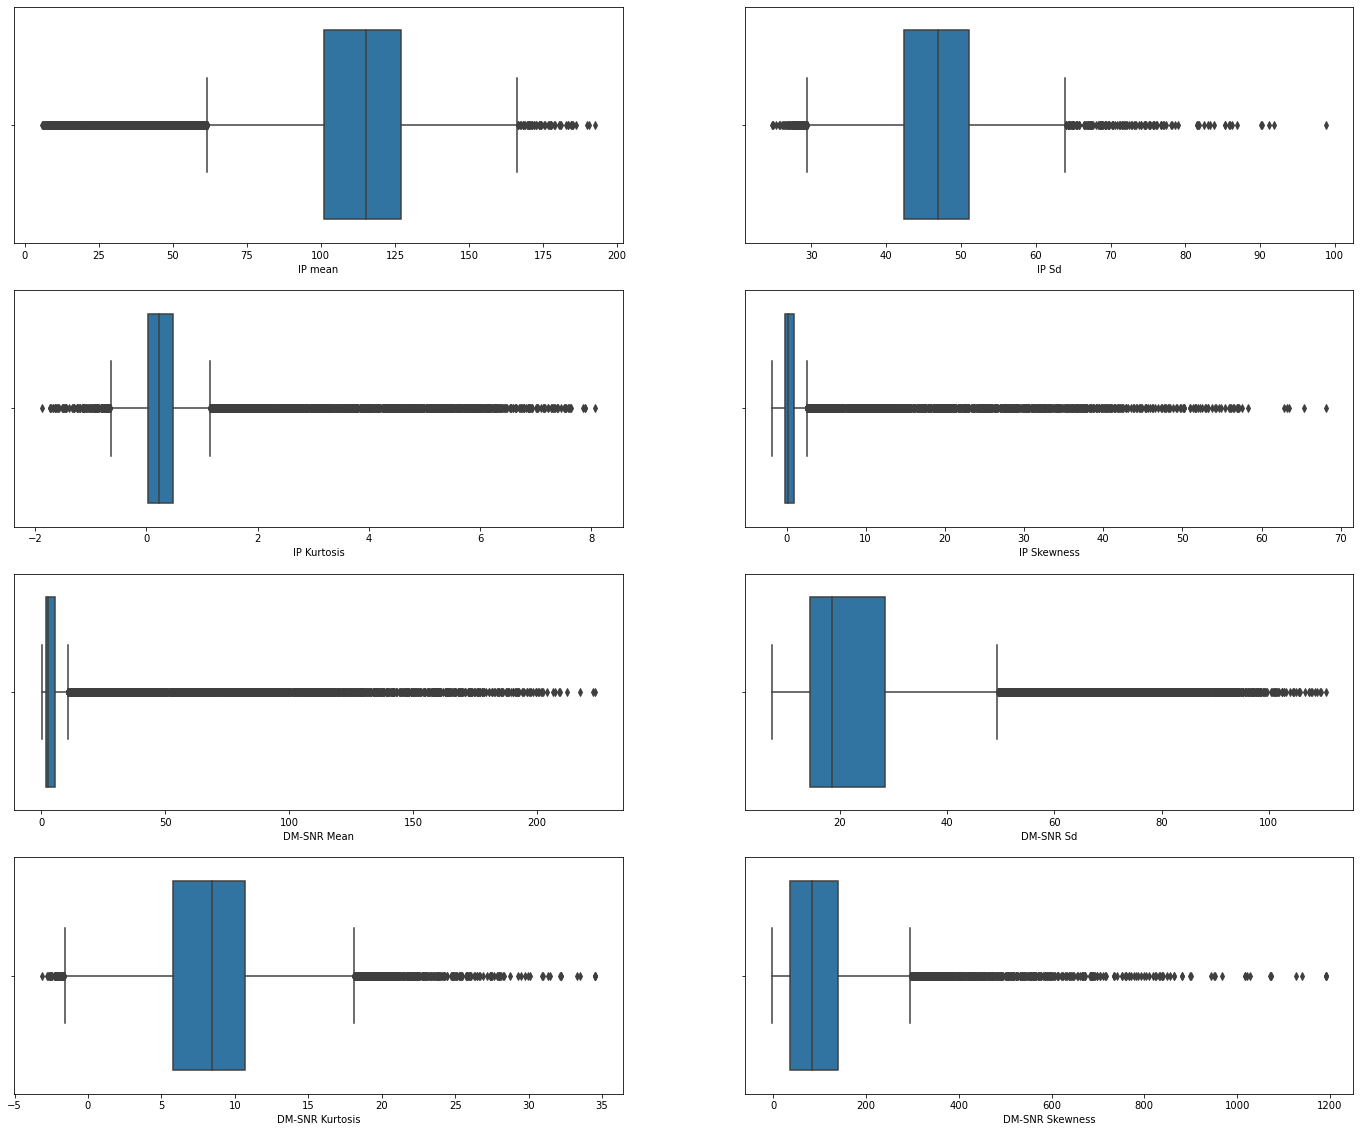

In [14]:
plt.figure(figsize=(24, 20))
for i in range(len(df.drop(columns="target_class").columns)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=df.drop(columns="target_class").columns[i])


In [72]:
# Bütün sütunlarda extreme değerler olduğunu görüyoruz.

### Handle outliers with SVMs


There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or 
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The message is that since the dataset contains outliers, so the value of C should be high while training the model.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. 

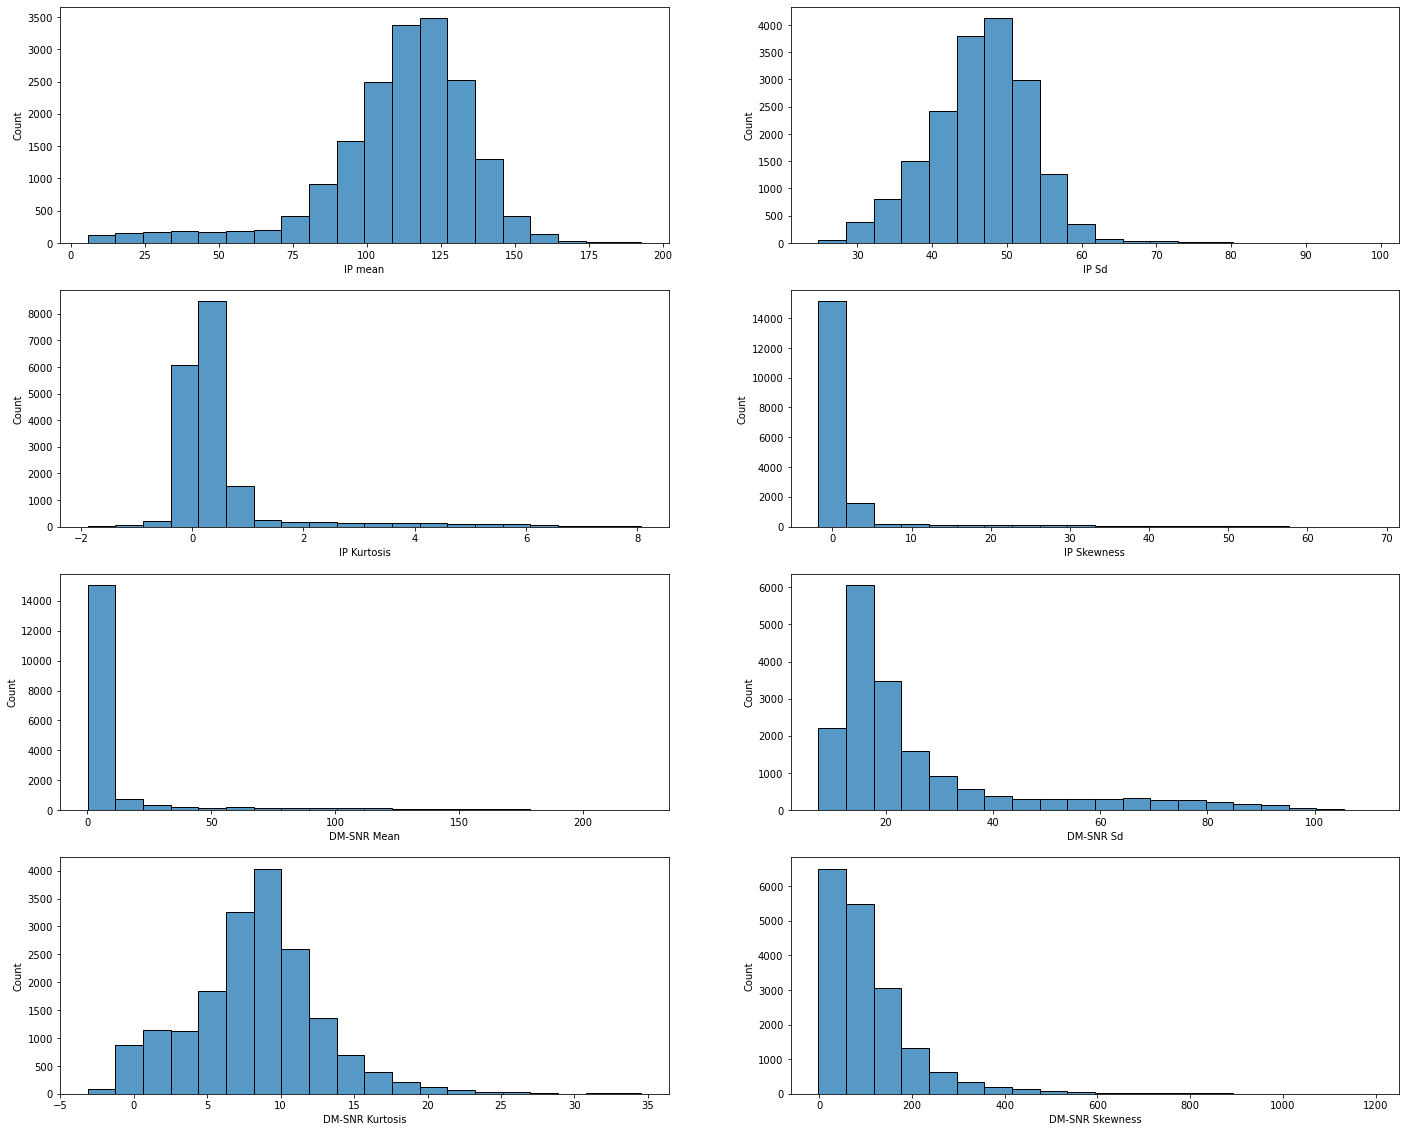

In [73]:
plt.figure(figsize=(24,20))
for i in range(len(df.drop(columns="target_class").columns)):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=df.drop(columns="target_class").columns[i], bins=20)

In [74]:
# Bütün feature'ların skewed olduğunu görüyoruz.

# **5. Declare feature vector and target variable** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [75]:
X = df.drop(columns="target_class")
y = df["target_class"]

# **6. Feature Scaling** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [83]:
# Feature'larımızın min ve max aralıkları farklı olduğu için scaling yapmamız şart.

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
# Burada target'ı da scale etti o yüzden target'ı yeniden atayacağım.
df_sc["target_class"]  = df["target_class"]

In [86]:
df_sc.head()

,IP mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438,0
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581,0
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373,0
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300,0
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794,0


# **7. Split data into separate training and test set** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [89]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# **8. Run SVM with default hyperparameters** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [94]:
from sklearn.svm import SVC

In [91]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

# **9. Evaluating the Model on Test Dataset** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [97]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[3235   17]
 [  81  247]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.75      0.83       328

    accuracy                           0.97      3580
   macro avg       0.96      0.87      0.91      3580
weighted avg       0.97      0.97      0.97      3580


Train_Set
[[12948    59]
 [  328   983]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13007
           1       0.94      0.75      0.84      1311

    accuracy                           0.97     14318
   macro avg       0.96      0.87      0.91     14318
weighted avg       0.97      0.97      0.97     14318



### Cross Validation

In [102]:
from sklearn.pipeline import Pipeline

In [103]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.977930
test_precision    0.938804
test_recall       0.812335
test_f1           0.870719
dtype: float64

# **10. Run SVM with Best Parameters (GridSearchCV)** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [105]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = {
    "SVC__C" : [100, 200, 300, 400],
    "SVC__gamma" : ["scale"],
    "SVC__kernel" : ["rbf"]
}

In [152]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=0))]
pipe_model = Pipeline(steps=operations)

svc_model_grid = GridSearchCV(estimator=pipe_model, param_grid= param_grid, scoring="f1", cv = 10, n_jobs=-1)

In [153]:
svc_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(probability=True,
                                            random_state=0))]),
             n_jobs=-1,
             param_grid={'SVC__C': [100, 200, 300, 400],
                         'SVC__gamma': ['scale'], 'SVC__kernel': ['rbf']},
             scoring='f1')

In [154]:
svc_model_grid.best_score_

0.8819317488618779

In [155]:
svc_model_grid.best_params_

{'SVC__C': 100, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [156]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3242   10]
 [  54  274]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.96      0.84      0.90       328

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580


Train_Set
[[12961    46]
 [  188  1123]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13007
           1       0.96      0.86      0.91      1311

    accuracy                           0.98     14318
   macro avg       0.97      0.93      0.95     14318
weighted avg       0.98      0.98      0.98     14318



In [160]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C=100, gamma = "scale", kernel="rbf", probability=True, random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv= 10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy     0.979606
test_precision    0.936708
test_recall       0.833686
test_f1           0.881932
dtype: float64

# **11. Overall Performance of the Model** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

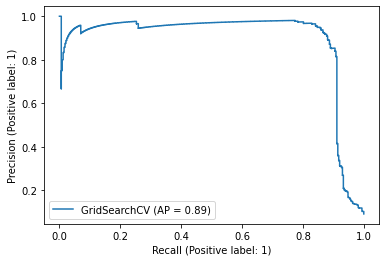

In [162]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_precision_recall_curve(svc_model_grid, X_test, y_test);

# **12. Finding the Best Threshold for Max F1 Score** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

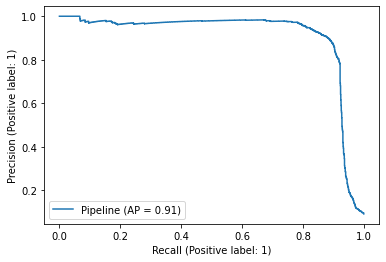

In [163]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)

svc_basic_model.fit(X_train, y_train)
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

In [164]:
y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.9098048452359778

In [167]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:, 1])

In [168]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.10018192925765407

In [169]:
y_pred2 = pd.Series(svc_model_grid.predict_proba(X_test)[:, 1]).apply(lambda x: 1 if x >= optimal_threshold else 0)

In [170]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[3230   22]
 [  44  284]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.93      0.87      0.90       328

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [172]:
y_train_pred2 = pd.Series(svc_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[12933    74]
 [  151  1160]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13007
           1       0.94      0.88      0.91      1311

    accuracy                           0.98     14318
   macro avg       0.96      0.94      0.95     14318
weighted avg       0.98      0.98      0.98     14318



[Go to Top](#0)